### <span id="0">Computer-exam BFVM23DATASC5 - Supervised Learning</span>

# 2024-2025 - first opportunity, Fri. 08 Nov 2025, 09:00-13:00, ZP11/H1.86

Take a minute to read the following instructions and information.

## Materials

On BlackBoard you will find a zip-file containing the following materials:

* this exam `BFVM23DATASC5_T_DataScience5_SupervisedLearning_2425_DSLS_KRPE-LADR.ipynb` (also as `*.pdf`);
* data files `nhefs.pkl` and `nhefs_codebook.csv`.

## Instructions

This is an "open-book" exam that you take on school workstations using your own account. You are allowed to use any digital materials in your home folder, look up information on the internet, as well as consult any written materials. However, you are **not** allowed to utilize your own devices (e.g. telephone or laptop) or use communication media or AI-tools (e.g. chat and ChatGPT); this will be considered fraud.

You are allowed to leave the exam room for toilet or coffee breaks, except during the first and last hour of the scheduled exam time. You are not permitted to confer with fellow students about code.

This exam consists of the following parts:

1. **<a href="#1">Part I</a>**: Missing data imputation <small>[20 pts]</small>

2. **<a href="#2">Part II</a>**: Feature importance <small>[20 pts]</small>

3. **<a href="#3">Part III</a>**: A decision tree variant <small>[20 pts]</small>

4. **<a href="#4">Part IV</a>**: Optimized predictive pipeline <small>[30 pts]</small>

Each part directs you to perform a particular supervised-machine learning analysis. If you do not understand what is meant, you may ask the exam's supervisor for clarification. Execute the analysis that is requested. Use your own judgement to perform any steps that you deem necessary, even if those are not all explicitly requested.

The various parts have a logical order, but can be answered separately; therefore, you can always continue to a next part. If you are unable to (fully) solve one part, an explanation of your intended solution in the form of text or pseudo-code may be awarded partial credit.

<div class="alert alert-warning">

**Note:** Do not only provide code solutions, but explain by means of comments and/or text markup why you perform steps, as well as what you conclude from the output of an analysis!

</div>

Save your notebook regularly to avoid inadvertent loss of your progress! Instructions on how to submit your answers after you finish are provided at the very <a href="#X">bottom</a>.

## Assessment

All parts have the possible number of points to be scored indicated. Your grade will be calculated as follows:

$$
\text{Grade} = 1 + 9 \cdot \frac {\text{Points Scored}} {\text{Maximum Score}}
$$

* 50 % of your grade is based on the insightfulness of provided explanations, motivations, interpretations, and conclusions drawn from your analyses.

* 50 % of your grade is based on the correctness, completeness, efficiency, and intelligibility of the code(*) that you produce.

*: If you only make use of standard `sklearn` regressor/classifier classes, the maximum final grade is an 8; if you also use your own classes developed during the course, the maximum grade is a 10.

***

## Data

In this assignment you will be working with a dataset from the [National Health and Nutrition Examination Survey](https://wwwn.cdc.gov/Nchs/Nhanes/Nhefs/Default.aspx) (NHEFS) longitudinal cohort study that was jointly initiated by the National Center for Health Statistics and the National Institute on Aging in collaboration with other agencies of the Public Health Service in the USA. The NHEFS was designed to investigate the relationships between clinical, nutritional, and behavioral factors and subsequent morbidity, mortality, and hospital utilization, as well as changes in risk factors, functional limitation, and institutionalization. Thousands of people were followed and measurements were performed for several decades.

The present dataset and codebook comprises a selection of these data that are available [online](https://vincentarelbundock.github.io/Rdatasets/doc/causaldata/nhefs.html). Moderate preprocessing was performed, dropping some features of minor interest, recoding some values, and dropping a small number of instances with too many missing values. All data were saved in a dataframe, with each column being of either a numeric (`float64`) or categorical (`category`) data type.

Run the cell below to import the data into a variable `data` and to show a sample of the 1536 instances.

In [5]:
import pandas as pd

data = pd.read_pickle('./nhefs.pkl')

data

,age,sex,race,marital,education,school,ht,wt71,dbp,sbp,...,otherpain,weakheart,allergies,nerves,lackpep,hbpmed,boweltrouble,wtloss,infection,death
0,42.0,0,1,2,1,7.0,174.18750,79.04,96.0,175.0,...,0,0,0,0,0,1,0,0,0,0
1,36.0,0,0,2,2,9.0,159.37500,58.63,80.0,123.0,...,0,0,0,0,0,0,0,0,1,0
2,56.0,1,1,3,2,11.0,168.50000,56.81,75.0,115.0,...,1,0,0,1,0,0,0,0,0,0
3,68.0,0,1,3,1,5.0,170.18750,59.42,78.0,148.0,...,1,1,0,0,0,0,0,0,0,1
4,40.0,0,0,2,2,11.0,181.87500,87.09,77.0,118.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,42.0,0,0,4,1,7.0,175.68750,54.54,64.0,119.0,...,0,0,0,1,0,NaN,NaN,0,0,0
1532,47.0,1,0,5,1,8.0,167.18750,84.94,77.0,125.0,...,1,0,0,0,0,NaN,NaN,0,1,0
1533,47.0,1,0,2,1,8.0,170.09375,57.72,80.0,124.0,...,0,0,0,0,0,NaN,NaN,0,0,0
1534,68.0,0,0,2,1,6.0,162.59375,52.39,77.0,171.0,...,1,0,0,0,0,NaN,NaN,0,0,0


The data can be converted to a `numpy` floating-point feature matrix using notation like `X = data.to_numpy()`.

More information about the interpretation of the variables is available in a codebook that accompanies the original dataset. Below, a brief description of all 43 features in the above dataframe is shown together with their total number of missing values as well as their data type. Moreover, for numeric features the mean ± SD is given, whereas for categorical features the possible values of the variable are shown. 

In [2]:
codebook = pd.read_csv('./nhefs_codebook.csv', index_col='variable', usecols=['variable', 'description'])
codebook = codebook.loc[data.columns, :].assign(dtype=data.dtypes, NAs=data.isna().sum(), values='')
for feature in data.select_dtypes('float'):
    codebook.loc[feature, 'values'] = f'{data[feature].mean():.1f} ± {data[feature].std():.1f}'
for feature in data.select_dtypes('category'):
    codebook.loc[feature, 'values'] = '|'.join(str(cat) for cat in data[feature].cat.categories)
codebook = codebook.reset_index(names='feature')

codebook

,feature,description,dtype,NAs,values
0,age,AGE IN 1971,float64,0,43.7 ± 12.0
1,sex,0: MALE 1: FEMALE,category,0,0|1
2,race,0: WHITE 1: BLACK OR OTHER IN 1971,category,0,0|1
3,marital,"MARITAL STATUS IN 1971 1: Under 17, 2: Marrie...",category,0,2|3|4|5|6|8
4,education,AMOUNT OF EDUCATION BY 1971: 1: 8TH GRADE OR L...,category,0,1|2|3|4|5
5,school,HIGHEST GRADE OF REGULAR SCHOOL EVER IN 1971,float64,0,11.2 ± 3.1
6,ht,HEIGHT IN CENTIMETERS IN 1971,float64,0,168.7 ± 9.0
7,wt71,WEIGHT IN KILOGRAMS IN 1971,float64,0,71.0 ± 15.4
8,dbp,DIASTOLIC BLOOD PRESSURE IN 1982,float64,4,77.8 ± 10.6
9,sbp,SYSTOLIC BLOOD PRESSURE IN 1982,float64,0,128.8 ± 19.1


Note that with the exception of marital status only, the categorical features are mostly binary (0, 1) or otherwise ordinal. Numeric features have diverging scales. In total, five features have missing values. 

<a id="1" href="#0" style="text-align: right; display: block;">Back to top</a>

## Part I: Missing data imputation <small>[20 pts]</small>

Only one *numeric* feature includes missing values:

* `dbp` *diastolic blood pressure*

This value is missing for 4 instances. However, data is available for various other closely related features, including in particular *systolic blood pressure* (`sbp`).

In addition, missing values occur in four *categorical* features that indicate whether an individual suffers (/suffered) from particular diseases, or is (/was) prescribed certain medication:

* `hbp` *high blood pressure*

* `diabetes` *diabetes*

* `hbpmed` *high blood pressure medication*

* `boweltrouble` *bowel trouble medication*

For these features, a value `0` (never) or `1` (ever) indicates absence or presence of the disease or medication. Values are always missing for exactly the same set of 748 individuals.

**Assignment**

Perform imputation by predicting the missing values from other available features:

* first, extract a subset from the entire data that consists of only the attributes and instances without any missing values whatsoever; 

* next, for each of the above five numeric or categorical features that have missing values ...

  * ... choose a type of supervised machine learning model that you deem suitable to predict that feature from some, or all, of the available other features,
  
  * ... train your selected model using the subset of data without missing values, and
  
  * ... report a suitable evaluation metric that compares the model's predictions to the actual targets;

* finally, for each such feature with missing data, apply the corresponding trained model to the instances with missing values to replace those with predicted values.

In this step you do **not** need to optimize your chosen model type. However, do motivate which type of model(s) and metric(s) you deem suitable and why, and provide your opinion on the quality of the obtained imputations.

For the next parts, use the dataset that has been completed using imputation.

<div class="alert alert-warning">

**Note:** If you are unable to complete this part, you can continue using only the instances that have no missing data (`data.dropna(inplace=True)`). However, this means that you will have less data to work with.

</div>

In [2]:
# YOUR ANSWER GOES HERE
import sys
sys.path.append("../supplementary")
sys.path.append("../../assignment1")
from LogisticRegression import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from Extra_python import MethodRecommender
from Extra_python import Imputate

complete = data.dropna()

print(complete.head())
print(complete.columns)

t1 = data.isna().sum()[data.isna().sum() > 0]
print(t1)
print(t1["dbp"])

print(data['hbp'].head())
print(data['hbpmed'].head())
print(data['diabetes'].head())
print(data['boweltrouble'].head())
print(data['dbp'].head())
# recom = MethodRecommender(


    age sex race marital education  school        ht   wt71   dbp    sbp  ...  \
0  42.0   0    1       2         1     7.0  174.1875  79.04  96.0  175.0  ...   
1  36.0   0    0       2         2     9.0  159.3750  58.63  80.0  123.0  ...   
2  56.0   1    1       3         2    11.0  168.5000  56.81  75.0  115.0  ...   
3  68.0   0    1       3         1     5.0  170.1875  59.42  78.0  148.0  ...   
4  40.0   0    0       2         2    11.0  181.8750  87.09  77.0  118.0  ...   

   otherpain weakheart allergies  nerves  lackpep hbpmed  boweltrouble  \
0          0         0         0       0        0      1             0   
1          0         0         0       0        0      0             0   
2          1         0         0       1        0      0             0   
3          1         1         0       0        0      0             0   
4          0         0         0       0        0      0             1   

   wtloss infection death  
0       0         0     0  
1       0   

In [25]:

df_train = data[data["diabetes"].notna()]  # complete rows for this target
df_missing = data[data["diabetes"].isna()] # rows to predict

print(df_train.shape, df_missing.shape)

#separate predictors and target

X_train = df_train.drop(columns=["diabetes"])  # keep as DataFrame
y_train = df_train["diabetes"].cat.codes.values.reshape(-1,1).astype(float)

X_missing = df_missing.drop(columns=["diabetes"])  # keep as DataFrame


#ONe hot encode categorical
X_train_numeric = pd.get_dummies(X_train, drop_first=True)
X_missing_numeric = pd.get_dummies(X_missing, drop_first=True)

# Align columns: ensure missing rows have same columns as training
X_missing_numeric = X_missing_numeric.reindex(columns=X_train_numeric.columns, fill_value=0)


# convert numpy arrays for my class
X_train_values = X_train_numeric.values.astype(float)
X_missing_values = X_missing_numeric.values.astype(float)


(788, 43) (748, 43)


In [26]:
from LogisticRegression import LogisticRegression

model = LogisticRegression(alpha=0.1, iter_n=5000, lambda_=0.1)
model.fit(X_train_values, y_train)


In [28]:
#predicting
y_missing_pred = model.predict(X_missing_values)

In [30]:
# fill missing values:
data.loc[data["diabetes"].isna(), "diabetes"] = y_missing_pred

In [31]:
print(data["diabetes"].isna().sum())  # should be 0
print(data["diabetes"].head(20))      # verify imputation


0
0     1
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: diabetes, dtype: category
Categories (2, int64): [0, 1]


In [6]:

#Class used

features_one_hot = ['hbp', 'hbpmed', 'diabetes', 'boweltrouble']

for targ in features_one_hot:
    model = LogisticRegression(alpha=0.1, iter_n=5000, lambda_=0.1)
    imputer = Imputate(data, target=targ, model=model)
    data = imputer.run_all()

features_continuous = ["dbp"]

for targ in features_continuous:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    imputer = Imputate(data, target=targ, model=model)
    data = imputer.run_all()
    

Validation Accuracy for 'hbp': 0.842
Imputed 748 missing values in 'hbp'.
Validation Accuracy for 'hbpmed': 0.943
Imputed 748 missing values in 'hbpmed'.
Validation Accuracy for 'diabetes': 0.994
Imputed 748 missing values in 'diabetes'.
Validation Accuracy for 'boweltrouble': 0.854
Imputed 748 missing values in 'boweltrouble'.


/home/jippe/anaconda3/envs/dsc5/lib/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation RMSE for 'dbp': 8.61


/home/jippe/anaconda3/envs/dsc5/lib/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Imputed 4 missing values in 'dbp'.


In [ ]:
from LogisticRegression import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# 5. Train model
if model_type == "logistic":
    model = LogisticRegression(alpha=0.1, iter_n=5000, lambda_=0.1)
    model.fit(X_train_values, y_train)
    y_missing_pred = model.predict(X_missing_values)
elif model_type == "linear":
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_values, y_train.ravel())
    y_missing_pred = model.predict(X_missing_values)

<a id="2" href="#0" style="text-align: right; display: block;">Back to top</a>

## Part II: Feature importance <small>[20 pts]</small>

We wish to assess what risk factors most strongly influence mortality; that is, which features have the strongest predictive effect on the `death` feature. One basic method is to rank features on for instance their correlation with the mortality outcome, or perform statistical tests to evaluate the significance of differences between surviving and deceased participants. However, this approach only assesses one feature at a time and is unable to capture additive or interacting effects that involve multiple features. In contrast, machine learning models can deal with many features at a time. However, not all machine learning models give rise to a model that allows straightforward interpretation of which features play an important role.

**Assignment**

* Choose one type of supervised machine learning algorithm that results in a model that allows you to make some meaningful inferences about which features play an important role. Explain your choice. (For example, a dummy classifier would be a possible choice, but it would be a bad one since it does not consider the features at all.)

* Train your chosen model to predict the mortality (i.e. the `death` feature) from all other features. Insofar as your chosen model has any settings or hyperparameters that you can vary, perform some optimization to arrive at an "optimal" model. Determine the quality of your model(s) using a suitable metric. (You are not required to perform cross-validation here; i.e. you may resubstitute the training data as test data.)

* Inspect the model to infer which *five* features appear to be most influential, and explain qualitatively how they affect mortality. Are the results plausible and do they make intuitive sense?

I suggest Random Forest Classifier:

Can handle numeric + categorical features (after one-hot encoding)

Provides feature importance automatically

Captures nonlinear and interaction effects

Easy to implement and explain


In [10]:
from sklearn.ensemble import RandomForestClassifier
sys.path.append("../../optimize")
from Evaluation import Evaluator

# Separate predictors and target
X = data.drop(columns=["death"])
y = data["death"]

rf = RandomForestClassifier(
    n_estimators=500,       # number of trees
    max_depth=None,         # grow trees until leaves are pure
    random_state=42
)


# Convert categorical predictors to numeric
X_numeric = pd.get_dummies(X, drop_first=True)

# Convert target to numeric if needed
if pd.api.types.is_categorical_dtype(y):
    y = y.cat.codes
elif y.dtype == object:
    y = pd.factorize(y)[0]
    
rf.fit(X_numeric, y)
# Check accuracy on the training data
accuracy = rf.score(X_numeric, y)
print(f"Training accuracy: {accuracy:.3f}")

/tmp/ipykernel_10183/297045603.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(y):


Training accuracy: 1.000


In [11]:
import numpy as np

feature_importances = pd.Series(rf.feature_importances_, index=X_numeric.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Top 5 features
top5 = feature_importances.head(5)
print(top5)


age            0.154514
smokeyrs       0.129894
sbp            0.075600
cholesterol    0.064699
wt71           0.061054
dtype: float64


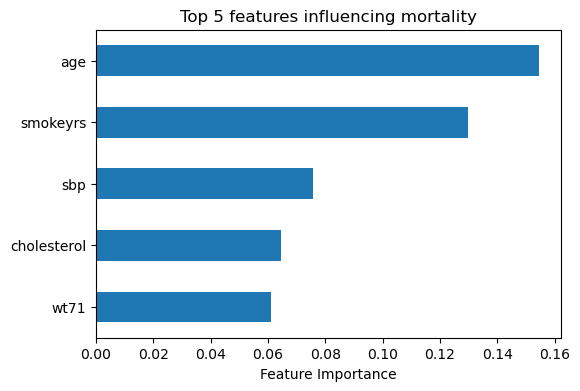

In [12]:
import matplotlib.pyplot as plt

top5.plot(kind='barh', figsize=(6,4))
plt.title("Top 5 features influencing mortality")
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()


<a id="3" href="#0" style="text-align: right; display: block;">Back to top</a>

## Part III: A decision tree variant <small>[20 pts]</small>

During training, decision trees make use of a cost function criterion to greedily split up instances according to some feature in each node. These criteria are derived from the distribution of class labels, described by probabilities $p_c$ (where $c$ indicates the various possible classes). The aim is to determine which split is able to *minimize* the averaged value of the criterion over the branches that leave the node.

The most common criterion in use is the [Shannon information entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)) $H$:

$$
H = \sum_c -p_c \lg \left( p_c \right)
$$

Another well-known criterion that `sklearn` provides by default is the [Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) $I$:

$$
I = 1 - \sum_c p_c^2
$$

**Assignment**

* Below three other uncommon criteria are listed. Only one of these is potentially suitable for use as a cost function to minimize during the construction of a decision tree. Which one is this? Motivate your answer by explaining what desirable property it has that the others do not have.

  a. $A = 1 - \max_c \left\{ p_c \right\}$
  
  b. $B = \sum_c p_c$
  
  c. $C = \sum_c \lg \left( \frac{1}{p_c} \right)$
  
* Implement your above chosen criterion in the form of a classifier that is compatible for use with `sklearn`. That is, it should be a class that can be trained (`fit(self, X, y)`) and applied (`predict(self, X)`; `predict_proba(self, X)`). Use recursion to build sub-branches of the tree. For extra credit, implement regularization hyperparameters like `max_depth` or `min_samples_split` (see the `sklearn` documentation). You may use the decision tree classifier that you constructed during class as a template. Either create a module that you import, or define the class in a notebook code cell.

* Apply your decision tree model to predict the mortality (i.e. the `death` feature) based on the other available features, and compare its performance to similar types of `DecisionTreeClassifier` that `sklearn` provides with criterion `'entropy'` or `'gini'`. (You are not required to perform cross-validation here; i.e. you may resubstitute the training data as test data.)

In [ ]:
#chatgpt results
import numpy as np
from collections import Counter

class EntropyTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value

    def _entropy(self, y):
        counts = np.bincount(y)
        probs = counts / counts.sum()
        probs = probs[probs > 0]
        return -np.sum(probs * np.log2(probs))

    def _best_split(self, X, y):
        m, n = X.shape
        best_feature, best_thresh, best_impurity = None, None, np.inf

        for feature in range(n):
            thresholds = np.unique(X[:, feature])
            for t in thresholds:
                left_idx = X[:, feature] <= t
                right_idx = X[:, feature] > t
                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue
                impurity = (len(y[left_idx]) * self._entropy(y[left_idx]) +
                            len(y[right_idx]) * self._entropy(y[right_idx])) / m
                if impurity < best_impurity:
                    best_feature, best_thresh, best_impurity = feature, t, impurity
        return best_feature, best_thresh

    def _build_tree(self, X, y, depth=0):
        num_samples = len(y)
        num_classes = len(np.unique(y))

        if (self.max_depth is not None and depth >= self.max_depth) or \
           num_samples < self.min_samples_split or \
           num_classes == 1:
            value = Counter(y).most_common(1)[0][0]
            return self.Node(value=value)

        feature, thresh = self._best_split(X, y)
        if feature is None:
            value = Counter(y).most_common(1)[0][0]
            return self.Node(value=value)

        left_idx = X[:, feature] <= thresh
        right_idx = X[:, feature] > thresh
        left = self._build_tree(X[left_idx], y[left_idx], depth+1)
        right = self._build_tree(X[right_idx], y[right_idx], depth+1)
        return self.Node(feature=feature, threshold=thresh, left=left, right=right)

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=int)
        self.tree = self._build_tree(X, y)
        return self

    def _predict_single(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_single(x, node.left)
        else:
            return self._predict_single(x, node.right)

    def predict(self, X):
        X = np.array(X, dtype=float)
        return np.array([self._predict_single(x, self.tree) for x in X])

    def predict_proba(self, X):
        pred = self.predict(X)
        classes = np.unique(pred)
        proba = np.zeros((len(pred), len(classes)))
        for i, c in enumerate(classes):
            proba[:, i] = (pred == c).astype(float)
        return proba


X_numeric = pd.get_dummies(data.drop(columns=["death"]), drop_first=True)
y = data["death"]
if pd.api.types.is_categorical_dtype(y):
    y = y.cat.codes
elif y.dtype == object:
    y = pd.factorize(y)[0]

tree_entropy = EntropyTree(max_depth=5, min_samples_split=10)
tree_entropy.fit(X_numeric, y)
y_pred = tree_entropy.predict(X_numeric)

accuracy = (y_pred == y).mean()
print(f"Training accuracy with entropy criterion: {accuracy:.3f}")


from sklearn.tree import DecisionTreeClassifier

dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=42)
dt_entropy.fit(X_numeric, y)
acc = (dt_entropy.predict(X_numeric) == y).mean()
print(f"Sklearn entropy tree training accuracy: {acc:.3f}")


In [5]:
# YOUR ANSWER GOES HERE
#chatgpt generated

import numpy as np
from collections import Counter

class MisclassificationTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value  # For leaf nodes

    def _misclassification_impurity(self, y):
        if len(y) == 0:
            return 0
        counts = np.bincount(y)
        p_max = np.max(counts) / len(y)
        return 1 - p_max

    def _best_split(self, X, y):
        m, n = X.shape
        best_feature, best_thresh, best_impurity = None, None, np.inf

        for feature in range(n):
            thresholds = np.unique(X[:, feature])
            for t in thresholds:
                left_idx = X[:, feature] <= t
                right_idx = X[:, feature] > t
                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue
                impurity = (len(y[left_idx]) * self._misclassification_impurity(y[left_idx]) +
                            len(y[right_idx]) * self._misclassification_impurity(y[right_idx])) / m
                if impurity < best_impurity:
                    best_feature, best_thresh, best_impurity = feature, t, impurity
        return best_feature, best_thresh

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or \
           num_samples < self.min_samples_split or \
           num_classes == 1:
            # Leaf node
            counts = Counter(y)
            value = counts.most_common(1)[0][0]
            return self.Node(value=value)

        feature, thresh = self._best_split(X, y)
        if feature is None:
            counts = Counter(y)
            value = counts.most_common(1)[0][0]
            return self.Node(value=value)

        left_idx = X[:, feature] <= thresh
        right_idx = X[:, feature] > thresh
        left = self._build_tree(X[left_idx], y[left_idx], depth+1)
        right = self._build_tree(X[right_idx], y[right_idx], depth+1)
        return self.Node(feature=feature, threshold=thresh, left=left, right=right)

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=int)
        self.tree = self._build_tree(X, y)
        return self

    def _predict_single(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_single(x, node.left)
        else:
            return self._predict_single(x, node.right)

    def predict(self, X):
        X = np.array(X, dtype=float)
        return np.array([self._predict_single(x, self.tree) for x in X])

    def predict_proba(self, X):
        # For simplicity, return 1 for predicted class and 0 for others
        pred = self.predict(X)
        classes = np.unique(pred)
        proba = np.zeros((len(pred), len(classes)))
        for i, c in enumerate(classes):
            proba[:, i] = (pred == c).astype(float)
        return proba


In [ ]:
# Prepare predictors and target
X = data.drop(columns=["death"])
y = data["death"]

X_numeric = pd.get_dummies(X, drop_first=True)
if pd.api.types.is_categorical_dtype(y):
    y = y.cat.codes
elif y.dtype == object:
    y = pd.factorize(y)[0]

# Fit our custom tree
custom_tree = MisclassificationTree(max_depth=5, min_samples_split=10)
custom_tree.fit(X_numeric, y)
y_pred = custom_tree.predict(X_numeric)

# Training accuracy
accuracy = (y_pred == y).mean()
print(f"Custom tree training accuracy: {accuracy:.3f}")


In [ ]:
from sklearn.tree import DecisionTreeClassifier

for crit in ['gini', 'entropy']:
    dt = DecisionTreeClassifier(criterion=crit, max_depth=5, min_samples_split=10, random_state=42)
    dt.fit(X_numeric, y)
    y_pred_dt = dt.predict(X_numeric)
    acc = (y_pred_dt == y).mean()
    print(f"Sklearn DecisionTree ({crit}) training accuracy: {acc:.3f}")


<a id="4" href="#0" style="text-align: right; display: block;">Back to top</a>

## Part IV: Optimized predictive pipeline <small>[30 pts]</small>

Your final goal is to predict mortality on the basis of the available individual measurements. In the previous parts you already had the opportunity to impute missing values, explore feature relevance, and test different types of decision trees on a small scale. In this final assignment, you are asked to develop an optimized pipeline for this purpose.

**Assignment**

Develop an optimized analysis pipeline that, given the features of an unlabeled instance, is able to predict the mortality risk (e.g. the `death` feature) as accurately as possible.

* Consider whether the dataset is sufficiently balanced, and if necessary take precautions to deal with any issues this may involve.

* Compare at least five different classification methods, including among other methods an ensemble learner, and choose the best.

* Insofar as applicable and useful, perform hyperparameter optimization to determine correct settings for your model. Moreover, apply some feature-selection and/or feature-engineering methods to arrive at a set of features that are relevant, and include only those in your final model.

* Throughout this final part, use cross-validation in order to be able to give an unbiased final evaluation of your model, that includes at least an ROC-plot and full characterization of the confusion matrix, plus any other metrics that you deem informative. Explicitly address the possibility of over-fitting. 

For all major steps in your development process, explain the choices that you make and why you made them. For all relevant results that you obtain, provide an interpretation in your own words and draw evidence-based conclusions.

In [13]:
# prepare data
import pandas as pd
import numpy as np

# Assume 'data' is already imputed
X = data.drop(columns=["death"])
y = data["death"]

# Convert categorical predictors
X_numeric = pd.get_dummies(X, drop_first=True)

# Encode target
if pd.api.types.is_categorical_dtype(y):
    y = y.cat.codes
elif y.dtype == object:
    y = pd.factorize(y)[0]


/tmp/ipykernel_10183/423401688.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(y):


0    1250
1     286
Name: count, dtype: int64


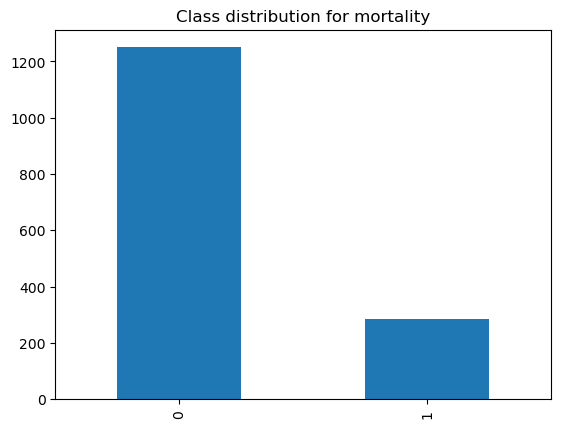

In [14]:
import matplotlib.pyplot as plt

counts = pd.Series(y).value_counts()
print(counts)
counts.plot(kind='bar')
plt.title("Class distribution for mortality")
plt.show()

# If very imbalanced, consider strategies:
# - class_weight='balanced' in models
# - oversampling minority class (SMOTE)
# - undersampling majority class


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, stratify=y, random_state=42
)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "Random Forest": {"n_estimators": [100, 200, 500], "max_depth": [None, 5, 10]},
    "Gradient Boosting": {"n_estimators": [100,200], "learning_rate":[0.05,0.1], "max_depth":[3,5]},
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "SVM": {"C":[0.1,1,10], "kernel":["linear","rbf"]},
    "KNN": {"n_neighbors":[3,5,7,9]}
}

# Example for Random Forest
grid_rf = GridSearchCV(models["Random Forest"], param_grid["Random Forest"], cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_


In [18]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(best_rf, threshold="median")
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)


In [19]:
best_rf.fit(X_train_selected, y_train)
y_pred = best_rf.predict(X_test_selected)
y_prob = best_rf.predict_proba(X_test_selected)[:,1]


Confusion Matrix:
[[205  46]
 [ 18  39]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.86       251
           1       0.46      0.68      0.55        57

    accuracy                           0.79       308
   macro avg       0.69      0.75      0.71       308
weighted avg       0.83      0.79      0.81       308



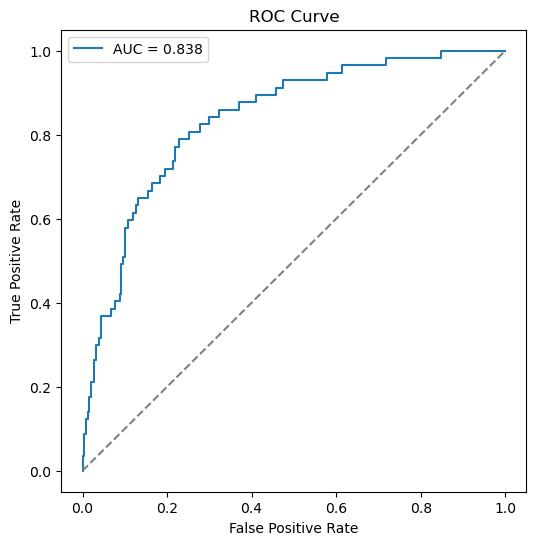

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification metrics
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Interpretation

Best model selection: choose the model with highest ROC-AUC and balanced performance metrics.

Feature importance: explain which features contribute most to mortality.

Overfitting check: if training accuracy >> test accuracy → reduce complexity or regularize.

Class imbalance: make sure your metrics reflect minority class performance (precision, recall, F1).

Step 9: Optional pipeline integration

In [21]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("feature_selection", SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42))),
    ("classifier", RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42))
])

pipeline.fit(X_train, y_train)


,steps,"[('feature_selection', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,estimator,RandomForestC...ndom_state=42)
,threshold,None
,prefit,False
,norm_order,1
,max_features,None
,importance_getter,'auto'
,n_estimators,200


***

<a id="X" href="#0" style="text-align: right; display: block;">Back to top</a>

<div class="alert alert-info">

**Note:** After finishing,

1. evaluate the notebook by means of the menu option `Kernel` > `Restart & Run All` and check that your notebook runs without errors;
2. save the evaluated notebook using the menu option `File` > `Save and Checkpoint`;
3. export your notebook as an *.html file using the menu option `File` > `Download as` > `HTML (.html)`;
4. place all your files in a folder and zip them (i.e. your completed notebook in *.ipynb and *.html form, plus any of your own required *.py modules; do **not** include original data files);
5. submit your work by clicking on the assignment title in BlackBoard, attaching the compressed zip-file, and submitting it;
6. if in doubt, you may check with the exam supervisor that your submission was successfully received;
7. you are free to leave!
    
*Success!*

</div>